잡케어추천알고리즘경진대회
--

In [64]:
import pandas as pd

train=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/train.csv", parse_dates=["contents_open_dt"])
test=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/test.csv", parse_dates=["contents_open_dt"])
D=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/속성_D_코드.csv")
H=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/속성_H_코드.csv")
L=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/속성_L_코드.csv")

In [65]:
test

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,...,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,...,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,...,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,...,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,...,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,46399,True,True,True,False,False,False,2,0,4,...,1,2,759,147,1,5,91,425040,726084,2020-12-17 01:06:26
46400,46400,True,False,False,True,False,False,2,0,4,...,1,2,759,147,1,4,91,290061,156948,2020-12-29 21:57:25
46401,46401,True,True,False,True,True,True,2,0,3,...,1,2,759,147,1,4,288,307951,175069,2020-12-10 19:09:09
46402,46402,True,True,False,True,True,True,1,3,3,...,3,2,759,147,1,5,288,308354,174849,2020-12-07 14:04:34


In [66]:
import warnings
warnings.filterwarnings('ignore')

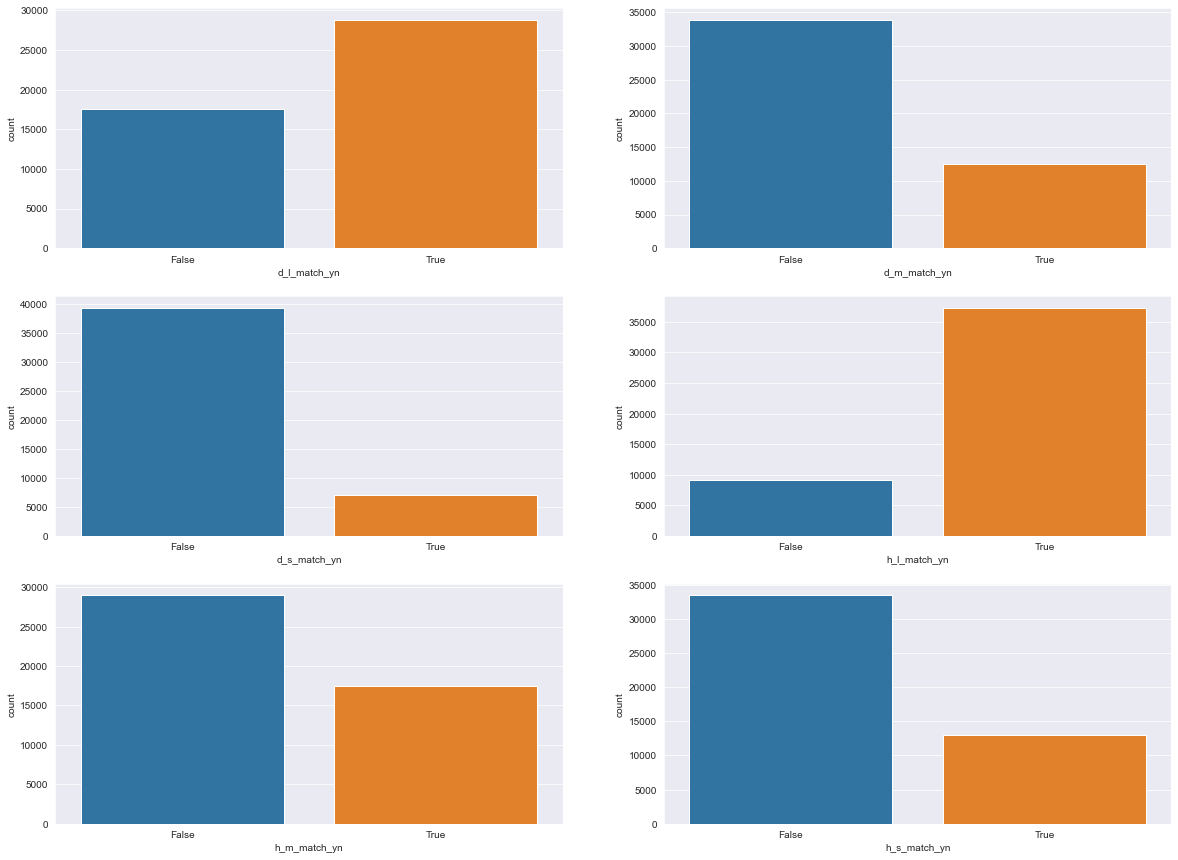

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) =plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(20,15)

sns.countplot(test['d_l_match_yn'], ax=ax1)
sns.countplot(test['d_m_match_yn'], ax=ax2)

sns.countplot(test['d_s_match_yn'], ax=ax3)
sns.countplot(test['h_l_match_yn'], ax=ax4)

sns.countplot(test['h_m_match_yn'], ax=ax5)
sns.countplot(test['h_s_match_yn'], ax=ax6)


sns.set_style("darkgrid")

- train 데이터와 큰 차이 없음

In [68]:
for i in range(1,7):
    name=test.columns[i]
    test[name]=test[name].apply(lambda x:"T" if x==True else "F")

In [69]:
test["match_yn"]=test['d_l_match_yn']+test['d_m_match_yn']+test["d_s_match_yn"]+test['h_l_match_yn']+test['h_m_match_yn']+test['h_s_match_yn']

In [70]:
len(test['match_yn'].unique())

16

- train 데이터와 마찬가지로 16가지

<AxesSubplot:xlabel='match_yn', ylabel='count'>

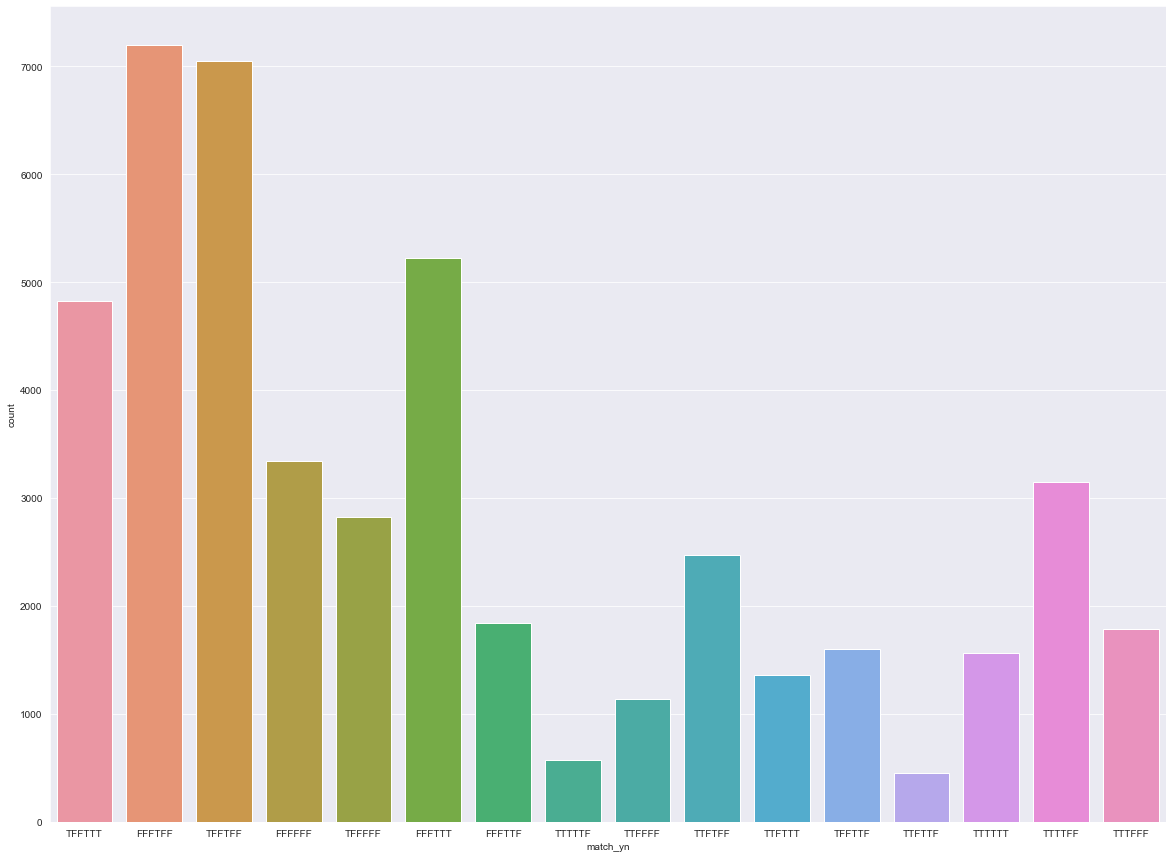

In [71]:
figure, (ax1) =plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,15)

sns.countplot(test["match_yn"])

In [72]:
for i in range(1,7):
    name=train.columns[i]
    train[name]=train[name].apply(lambda x:"T" if x==True else "F")

In [73]:
train["match_yn"]=train['d_l_match_yn']+train['d_m_match_yn']+train["d_s_match_yn"]+train['h_l_match_yn']+train['h_m_match_yn']+train['h_s_match_yn']

In [74]:
from collections import Counter
cnt_te=Counter(test["match_yn"])
cnt_te.most_common(5)

[('FFFTFF', 7196),
 ('TFFTFF', 7051),
 ('FFFTTT', 5224),
 ('TFFTTT', 4826),
 ('FFFFFF', 3343)]

In [75]:
cnt_tn=Counter(train["match_yn"])
cnt_tn.most_common(5)

[('FFFTFF', 78861),
 ('TFFTFF', 78338),
 ('FFFTTT', 53091),
 ('TFFTTT', 52850),
 ('FFFFFF', 36913)]

- 가장 많은 5가지 유형 역시 train과 test 똑같음.

In [76]:
train["match_yn_d"]=0
train["match_yn_h"]=0

train["match_yn_h"]=train['h_l_match_yn']+train['h_m_match_yn']+train['h_s_match_yn']
train["match_yn_d"]=train['d_l_match_yn']+train['d_m_match_yn']+train["d_s_match_yn"]

In [77]:
test["match_yn_d"]=0
test["match_yn_h"]=0

test["match_yn_h"]=test['h_l_match_yn']+test['h_m_match_yn']+test['h_s_match_yn']
test["match_yn_d"]=test['d_l_match_yn']+test['d_m_match_yn']+test["d_s_match_yn"]

In [78]:
cnt_te=Counter(test["match_yn_d"])
cnt_te.most_common(4)

[('FFF', 17606), ('TFF', 16298), ('TTT', 7076), ('TTF', 5424)]

In [79]:
cnt_te=Counter(train["match_yn_d"])
cnt_te.most_common(4)

[('FFF', 186683), ('TFF', 181641), ('TTT', 75257), ('TTF', 58370)]

- train, test 둘 다 d_mattch_yn의 특성은 같음


In [80]:
cnt_te=Counter(test["match_yn_h"])
cnt_te.most_common(4)

[('TFF', 19868), ('TTT', 12974), ('FFF', 9089), ('TTF', 4473)]

In [81]:
cnt_te=Counter(train["match_yn_h"])
cnt_te.most_common(4)

[('TFF', 216205), ('TTT', 136629), ('FFF', 102613), ('TTF', 46504)]

- train, test 둘 다 h_mattch_yn의 특성은 같음

In [82]:
p1=test.loc[test["person_attribute_a"]==1]
p2=test.loc[test["person_attribute_a"]==2]

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'person_attribute_a==2')]

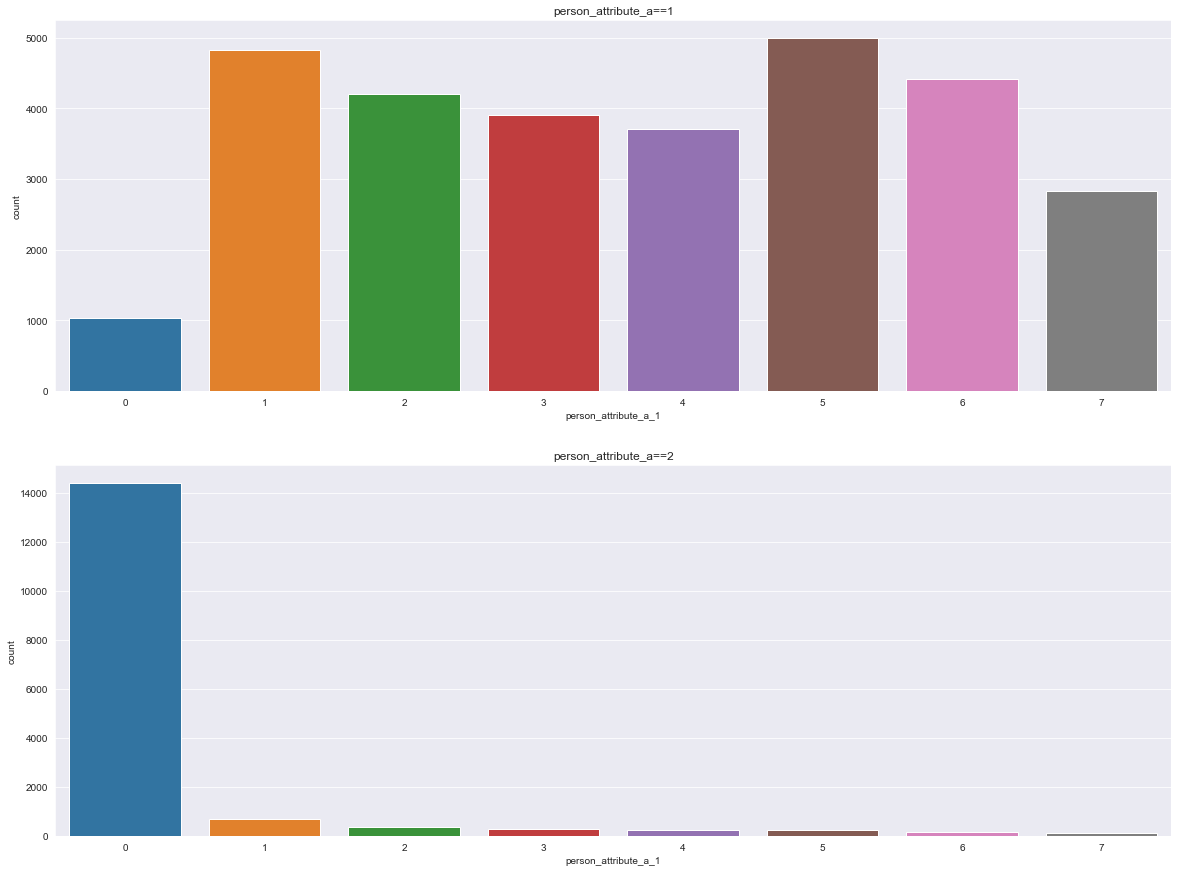

In [83]:
figure, (ax1, ax2) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,15)

sns.countplot(p1["person_attribute_a_1"], ax=ax1)
sns.countplot(p2["person_attribute_a_1"], ax=ax2)

ax1.set(ylabel='count', title ="person_attribute_a==1")
ax2.set(ylabel='count', title ="person_attribute_a==2")

- person attribute_a 별로 살펴본 결과, train, test 둘 다 비슷함 

<AxesSubplot:xlabel='person_prefer_c', ylabel='count'>

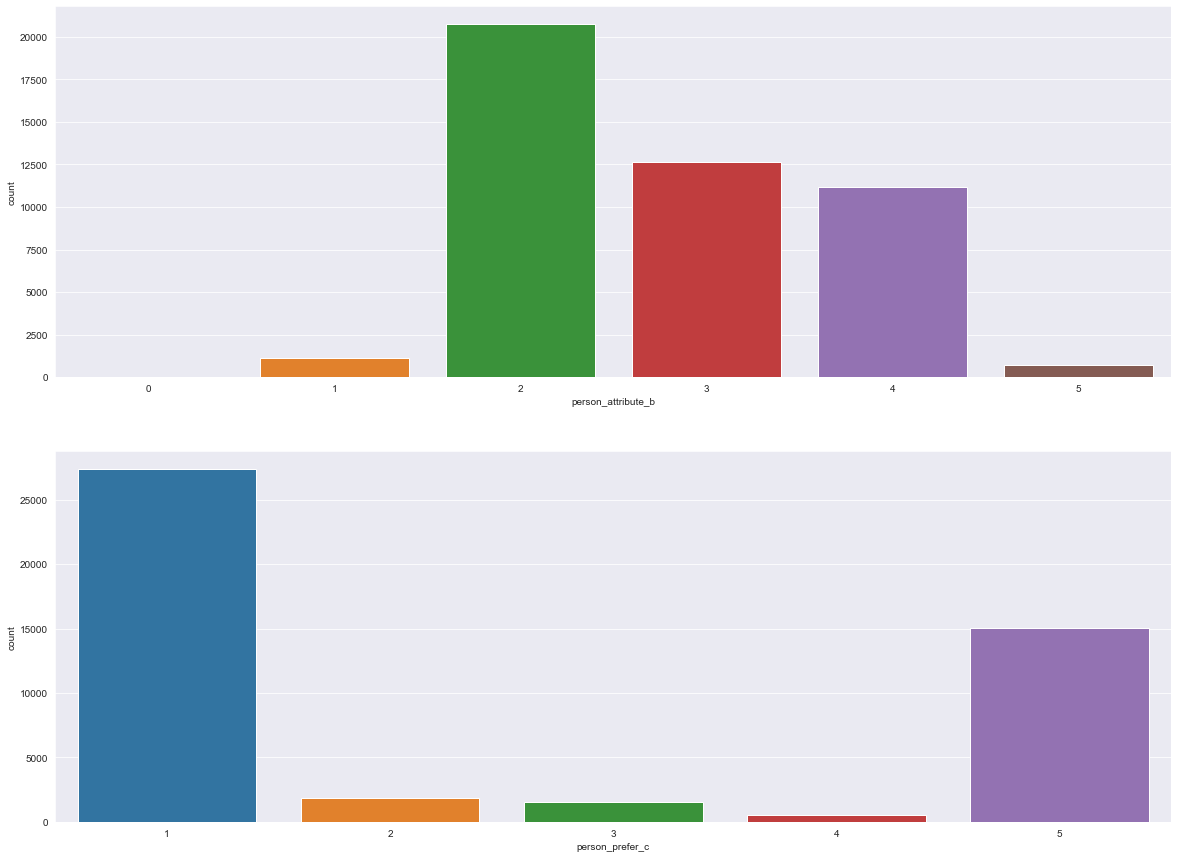

In [84]:
figure, (ax1, ax2) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,15)

sns.countplot(test["person_attribute_b"], ax=ax1)
sns.countplot(test["person_prefer_c"], ax=ax2)

- train 데이터와 특성이 비슷함

<AxesSubplot:xlabel='person_prefer_d_3'>

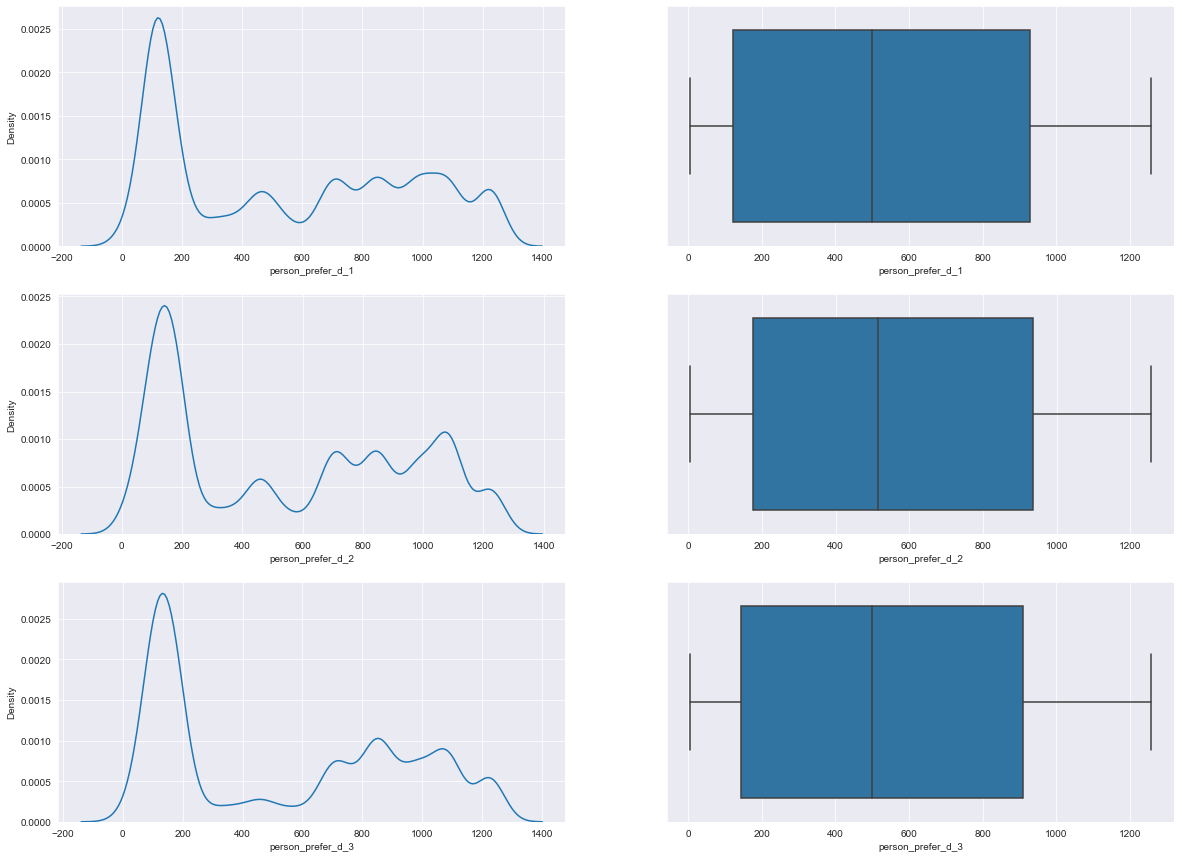

In [85]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) =plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(20,15)

sns.kdeplot(test["person_prefer_d_1"], ax=ax1)
sns.boxplot(test["person_prefer_d_1"], ax=ax2)
sns.kdeplot(test["person_prefer_d_2"], ax=ax3)
sns.boxplot(test["person_prefer_d_2"], ax=ax4)
sns.kdeplot(test["person_prefer_d_3"], ax=ax5)
sns.boxplot(test["person_prefer_d_3"], ax=ax6)

- 분포가 train 데이터와 미세한 차이가 존재 


- 3개 칼럼 전부, 숫자가 높은 쪽에 밀도가 조금 더 존재함

<AxesSubplot:xlabel='person_prefer_e', ylabel='count'>

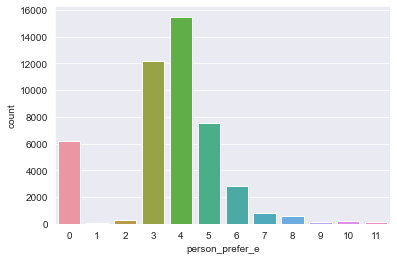

In [86]:
sns.countplot(test["person_prefer_e"])

- train 데이터와 별반 차이 없음

In [87]:
print(test["person_prefer_f"].unique())
print(test["person_prefer_g"].unique())

[1]
[1]


- test 데이터도  train 데이터와  마찬가지로 해당 칼럼이 전부 1임.

<AxesSubplot:xlabel='person_prefer_h_3'>

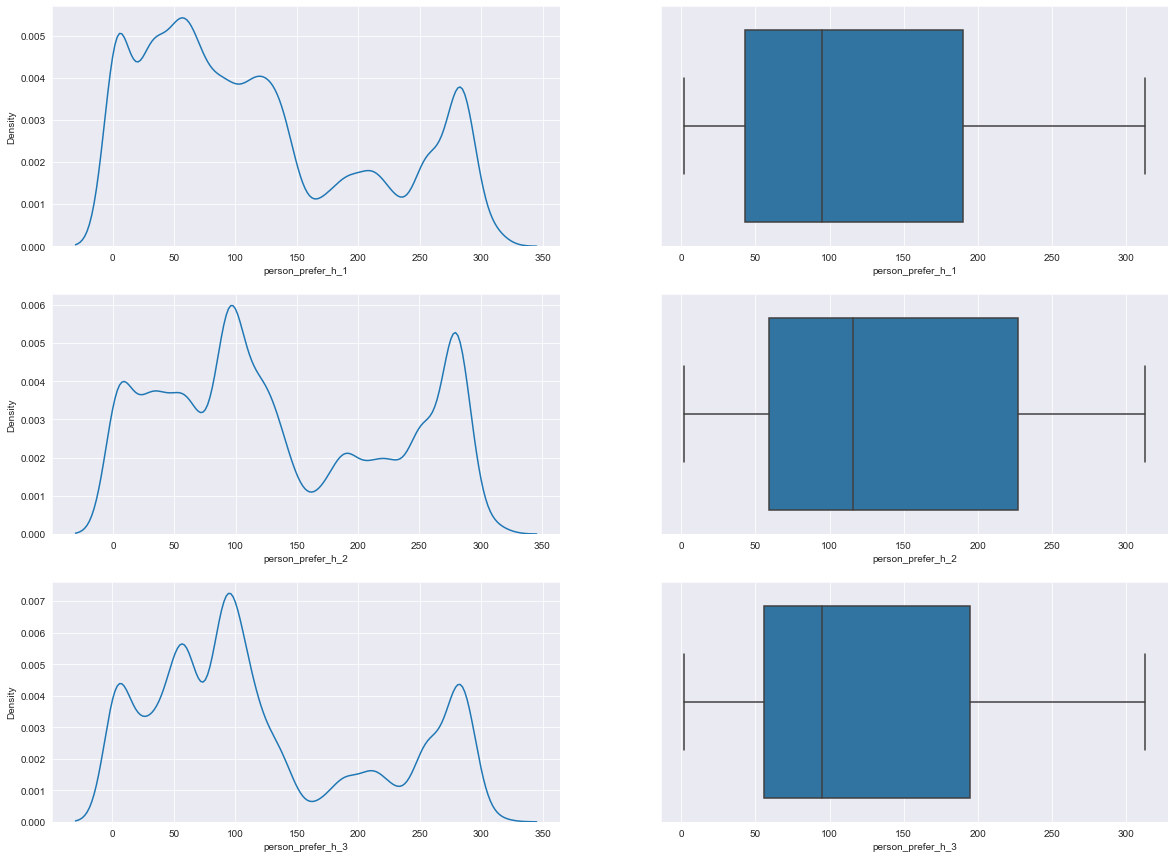

In [88]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) =plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(20,15)

sns.kdeplot(test["person_prefer_h_1"], ax=ax1)
sns.boxplot(test["person_prefer_h_1"], ax=ax2)

sns.kdeplot(test["person_prefer_h_2"], ax=ax3)
sns.boxplot(test["person_prefer_h_2"], ax=ax4)

sns.kdeplot(test["person_prefer_h_3"], ax=ax5)
sns.boxplot(test["person_prefer_h_3"], ax=ax6)

- 분포가 train 데이터와 미세한 차이가 존재 


- 3개 칼럼 전부, 숫자가 낮은 쪽에 밀도가 조금 더 존재함

- train 데이터와 test 데이터의 차이는 person_preger 속성에서 차이가 존재하는 듯

컨텐츠 속성
--

In [89]:
test["contents_attribute_i"].unique()

array([1, 3, 2], dtype=int64)

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'contents_attribute_e')]

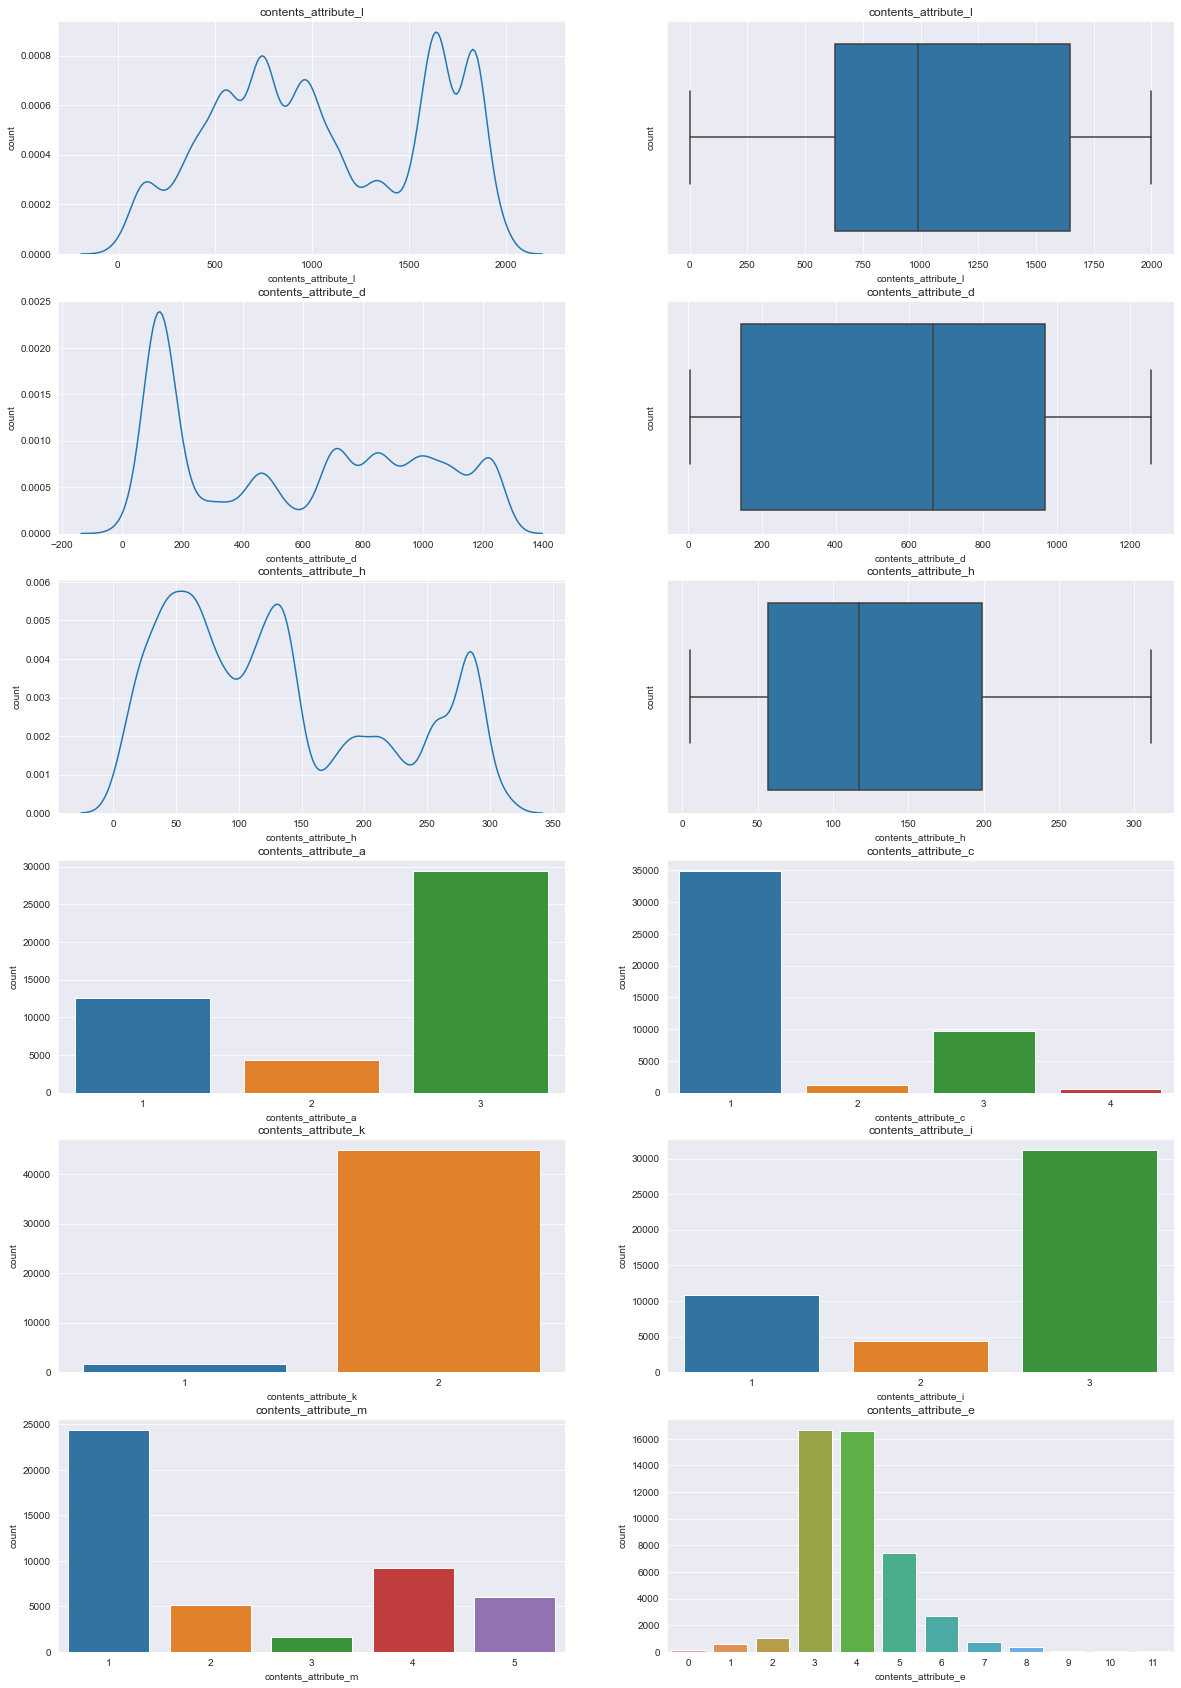

In [90]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) =plt.subplots(nrows=6,ncols=2)
figure.set_size_inches(20,30)

sns.kdeplot(test["contents_attribute_l"], ax=ax1)
sns.boxplot(test["contents_attribute_l"], ax=ax2)

sns.kdeplot(test["contents_attribute_d"], ax=ax3)
sns.boxplot(test["contents_attribute_d"], ax=ax4)

sns.kdeplot(test["contents_attribute_h"], ax=ax5)
sns.boxplot(test["contents_attribute_h"], ax=ax6)

sns.countplot(test["contents_attribute_a"], ax=ax7)
sns.countplot(test["contents_attribute_c"], ax=ax8)
sns.countplot(test["contents_attribute_k"], ax=ax9)
sns.countplot(test["contents_attribute_i"], ax=ax10)
sns.countplot(test["contents_attribute_m"], ax=ax11)
sns.countplot(test["contents_attribute_e"], ax=ax12)

ax1.set(ylabel='count', title ="contents_attribute_l")
ax2.set(ylabel='count', title ="contents_attribute_l")
ax3.set(ylabel='count', title ="contents_attribute_d")
ax4.set(ylabel='count', title ="contents_attribute_d")
ax5.set(ylabel='count', title ="contents_attribute_h")
ax6.set(ylabel='count', title ="contents_attribute_h")
ax7.set(ylabel='count', title ="contents_attribute_a")
ax8.set(ylabel='count', title ="contents_attribute_c")
ax9.set(ylabel='count', title ="contents_attribute_k")
ax10.set(ylabel='count', title ="contents_attribute_i")
ax11.set(ylabel='count', title ="contents_attribute_m")
ax12.set(ylabel='count', title ="contents_attribute_e")

- 컨텐츠 속성 역시,l, d, h에서 미세한 차이가 존재하긴 하지만, person_prefer 속성에 비해 육안으로 크게 차이가 있다고 느껴지지 않음.


<AxesSubplot:xlabel='contents_attribute_j_1', ylabel='count'>

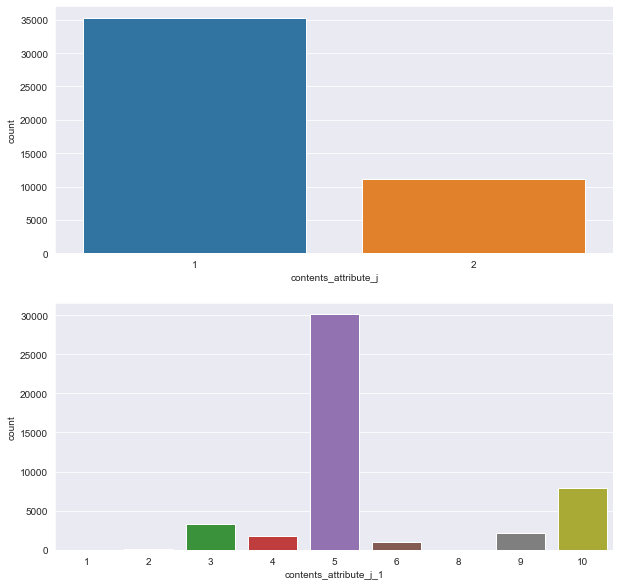

In [91]:
figure, (ax1, ax2) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(10,10)

sns.countplot(test["contents_attribute_j"], ax=ax1)
sns.countplot(test["contents_attribute_j_1"], ax=ax2)

- train 데이터와 큰 차이 없음

In [92]:
c1=test.loc[test["contents_attribute_j"]==1]
c2=test.loc[test["contents_attribute_j"]==2]

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'contents_attribute_j==2')]

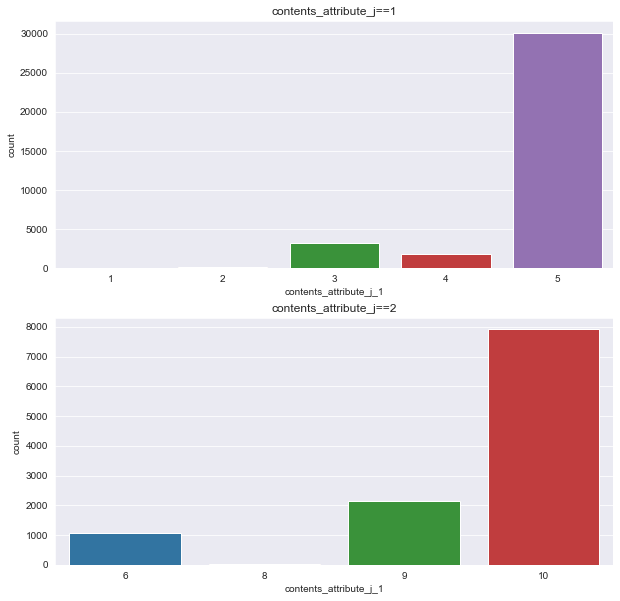

In [93]:
figure, (ax1, ax2) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(10,10)

sns.countplot(c1["contents_attribute_j_1"], ax=ax1)
sns.countplot(c2["contents_attribute_j_1"], ax=ax2)

ax1.set(ylabel='count', title ="contents_attribute_j==1")
ax2.set(ylabel='count', title ="contents_attribute_j==2")

- train 데이터와 큰 차이 없음.

사용자 번호
--

In [94]:
print(len(test["person_rn"].unique()))
print(len(test.index))

34534
46404


In [95]:
cnt=Counter(test["person_rn"])
cnt.most_common(3)

[(993298, 15), (427267, 11), (992664, 10)]

In [96]:
cnt=Counter(train["person_rn"])
cnt.most_common(3)

[(627445, 20), (827703, 19), (1047079, 19)]

- train 데이터와 test 데이터에 차이가 존재함.

컨텐츠 번호
--

In [97]:
print(len(test["contents_rn"].unique()))
print(len(test.index))

31489
46404


In [98]:
cnt=Counter(test["contents_rn"])
cnt.most_common(3)

[(121075, 15), (142845, 15), (158486, 14)]

In [99]:
cnt=Counter(train["contents_rn"])
cnt.most_common(3)

[(22078, 39), (76824, 36), (138209, 32)]

- train 데이터와 test 데이터에 차이가 존재함.

컨텐츠 열람 일시
--

In [105]:
print(test["contents_open_dt"].max())
print(test["contents_open_dt"].min())

2020-12-31 23:59:08
2020-12-01 00:00:07


In [101]:
test["time"]=test["contents_open_dt"].dt.strftime("%m%d%H")
test["month"]=test["contents_open_dt"].dt.strftime("%m")
test["date"]=test["contents_open_dt"].dt.strftime("%d")
test["hour"]=test["contents_open_dt"].dt.strftime("%H")
test["day"]=test["contents_open_dt"].dt.strftime("%A")

test["time"]=test["time"].astype(int)
test["month"]=test["month"].astype(int)
test["date"]=test["date"].astype(int)
test["hour"]=test["hour"].astype(int)

In [103]:
train["time"]=train["contents_open_dt"].dt.strftime("%m%d%H")
train["month"]=train["contents_open_dt"].dt.strftime("%m")
train["date"]=train["contents_open_dt"].dt.strftime("%d")
train["hour"]=train["contents_open_dt"].dt.strftime("%H")
train["day"]=train["contents_open_dt"].dt.strftime("%A")

train["time"]=train["time"].astype(int)
train["month"]=train["month"].astype(int)
train["date"]=train["date"].astype(int)
train["hour"]=train["hour"].astype(int)

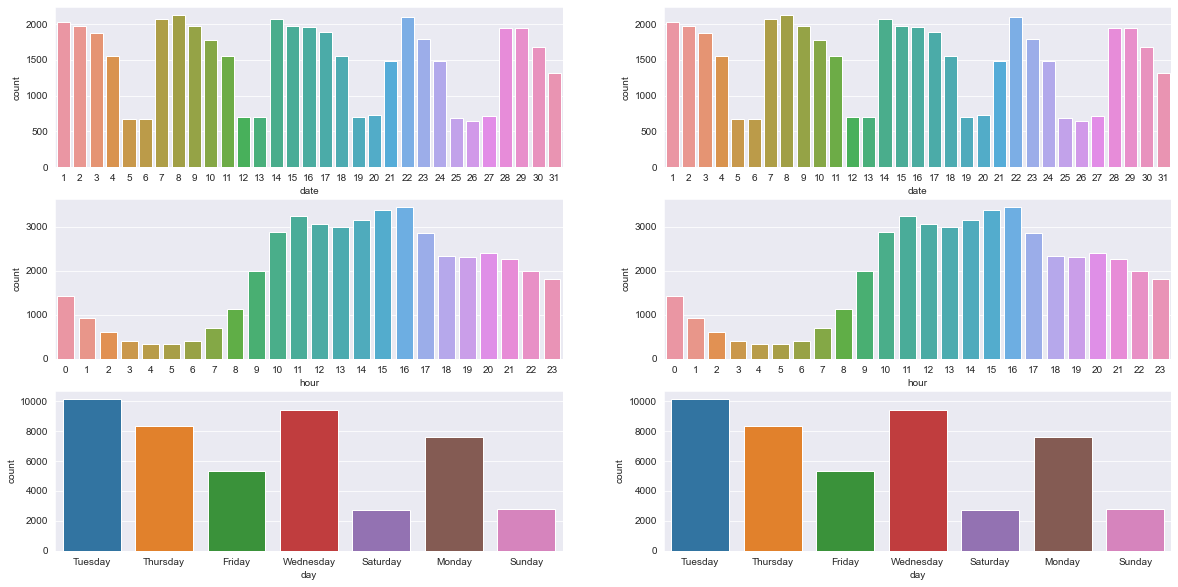

In [107]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) =plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(20,10)

sns.countplot(test['date'], ax=ax1)
sns.countplot(test['date'], ax=ax2)

sns.countplot(test['hour'], ax=ax3)
sns.countplot(test['hour'], ax=ax4)

sns.countplot(test['day'], ax=ax5)
sns.countplot(test['day'], ax=ax6)

sns.set_style("darkgrid")

- 시간 분포 자체가 크게 차이 나지는 않음.

In [108]:
for i in range(1,7):
    name=test.columns[i]
    test[name]=test[name].apply(lambda x:1 if x=="T" else 2)

In [109]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

test["match_yn"]=le.fit_transform(test["match_yn"])
test["match_yn_d"]=le.fit_transform(test["match_yn_d"])
test["match_yn_h"]=le.fit_transform(test["match_yn_h"])

In [110]:
test.drop("contents_open_dt", axis=1, inplace=True)

In [111]:
test["day"]=le.fit_transform(test["day"])

**현재까지, person_prefer_d, person_prefer_h, contents_attribute_l, contents_attribute_d, contents_attribute_h 에서는 차이가 존재하는 것으로 판단, 그 이외의 칼럼에서는 train 데이터와 크게 다른 점이 없는 것으로 판단 되어 짐**

person_prefer_d

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'test_person_d_3')]

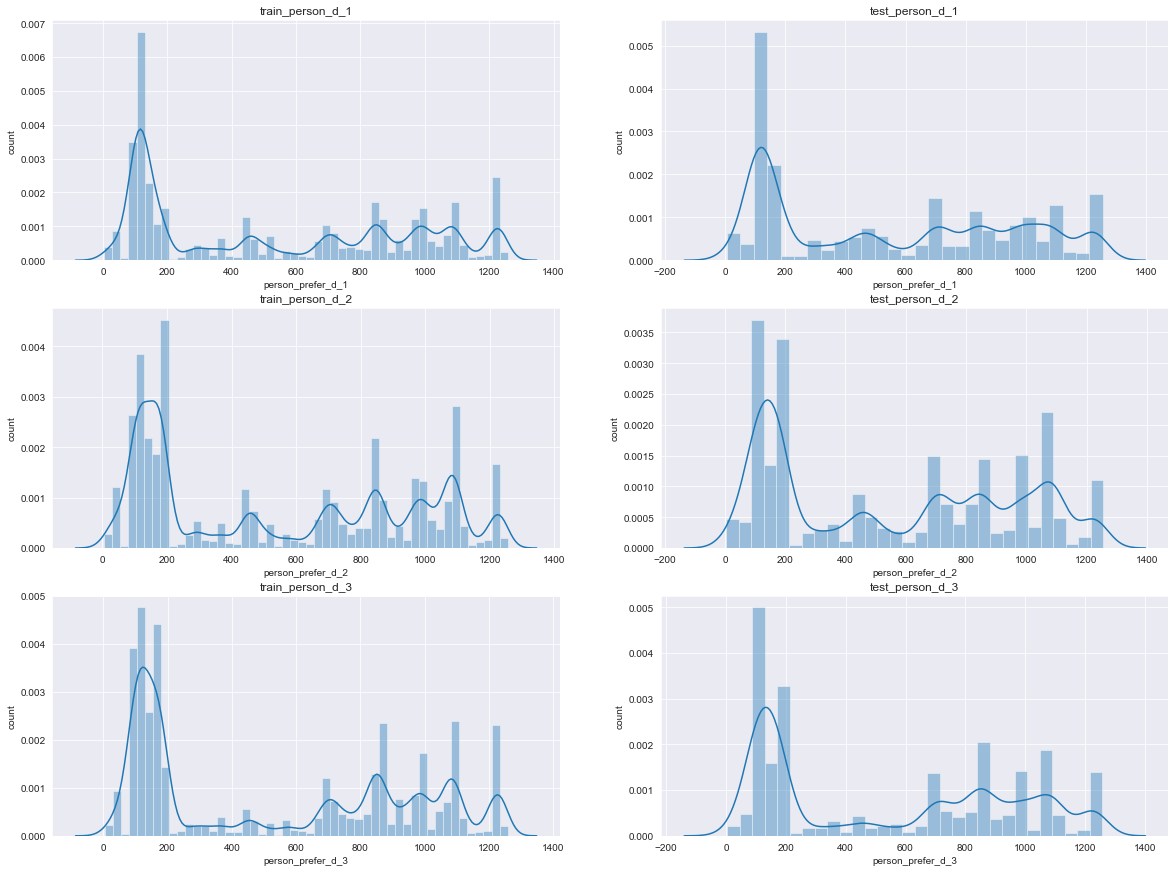

In [116]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) =plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(20,15)

sns.distplot(train["person_prefer_d_1"], ax=ax1)
sns.distplot(test["person_prefer_d_1"], ax=ax2)
sns.distplot(train["person_prefer_d_2"], ax=ax3)
sns.distplot(test["person_prefer_d_2"], ax=ax4)
sns.distplot(train["person_prefer_d_3"], ax=ax5)
sns.distplot(test["person_prefer_d_3"], ax=ax6)
         
ax1.set(ylabel='count', title ="train_person_d_1")
ax2.set(ylabel='count', title ="test_person_d_1")
ax3.set(ylabel='count', title ="train_person_d_2")
ax4.set(ylabel='count', title ="test_person_d_2")
ax5.set(ylabel='count', title ="train_person_d_3")
ax6.set(ylabel='count', title ="test_person_d_3")

In [134]:
def count_col(col1, col2):
    cnt_tn=Counter(col1)
    cnt_te=Counter(col2)
    print(f"train")
    print(cnt_tn.most_common(3))
    print(f"train values: {len(set(col1))}")
    print("---------------")
    print(f"test")
    print(cnt_te.most_common(3))
    print(f"test values: {len(set(col2))}")

In [135]:
count_col(train["person_prefer_d_1"], test["person_prefer_d_1"])

train
[(114, 41720), (102, 25470), (1227, 24337)]
train values: 1093
---------------
test
[(114, 3444), (1227, 2368), (102, 2041)]
test values: 955


In [136]:
count_col(train["person_prefer_d_2"], test["person_prefer_d_2"])

train
[(181, 49859), (1086, 19260), (175, 16558)]
train values: 1081
---------------
test
[(181, 4120), (1086, 1804), (175, 1461)]
test values: 863


In [137]:
count_col(train["person_prefer_d_3"], test["person_prefer_d_3"])

train
[(175, 49049), (857, 27014), (114, 26647)]
train values: 1043
---------------
test
[(175, 4220), (857, 2611), (114, 2347)]
test values: 775


person_prefer_h

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'test_person_h_3')]

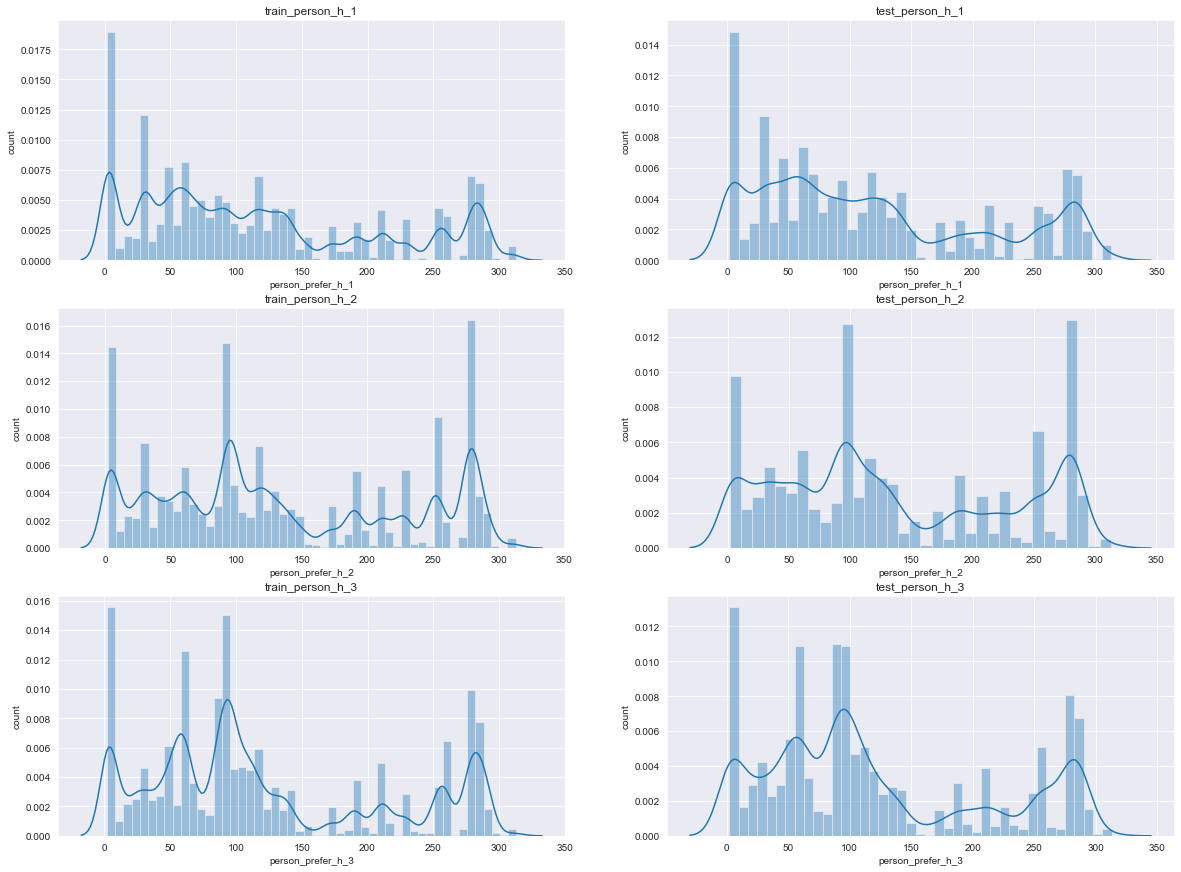

In [117]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) =plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(20,15)

sns.distplot(train["person_prefer_h_1"], ax=ax1)
sns.distplot(test["person_prefer_h_1"], ax=ax2)
sns.distplot(train["person_prefer_h_2"], ax=ax3)
sns.distplot(test["person_prefer_h_2"], ax=ax4)
sns.distplot(train["person_prefer_h_3"], ax=ax5)
sns.distplot(test["person_prefer_h_3"], ax=ax6)
         
ax1.set(ylabel='count', title ="train_person_h_1")
ax2.set(ylabel='count', title ="test_person_h_1")
ax3.set(ylabel='count', title ="train_person_h_2")
ax4.set(ylabel='count', title ="test_person_h_2")
ax5.set(ylabel='count', title ="train_person_h_3")
ax6.set(ylabel='count', title ="test_person_h_3")

In [138]:
count_col(train["person_prefer_h_1"], test["person_prefer_h_1"])

train
[(4, 35257), (31, 31393), (2, 22458)]
train values: 279
---------------
test
[(4, 3428), (31, 2863), (59, 1910)]
test values: 271


In [139]:
count_col(train["person_prefer_h_2"], test["person_prefer_h_2"])

train
[(95, 42383), (4, 36033), (278, 32846)]
train values: 279
---------------
test
[(95, 4054), (4, 3132), (278, 3100)]
test values: 274


In [140]:
count_col(train["person_prefer_h_3"], test["person_prefer_h_3"])

train
[(59, 36745), (95, 33260), (4, 29087)]
train values: 279
---------------
test
[(59, 3458), (95, 2815), (4, 2813)]
test values: 270


contents_attribute_l, contents_attribute_d, contents_attribute_h

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'test_contents_h')]

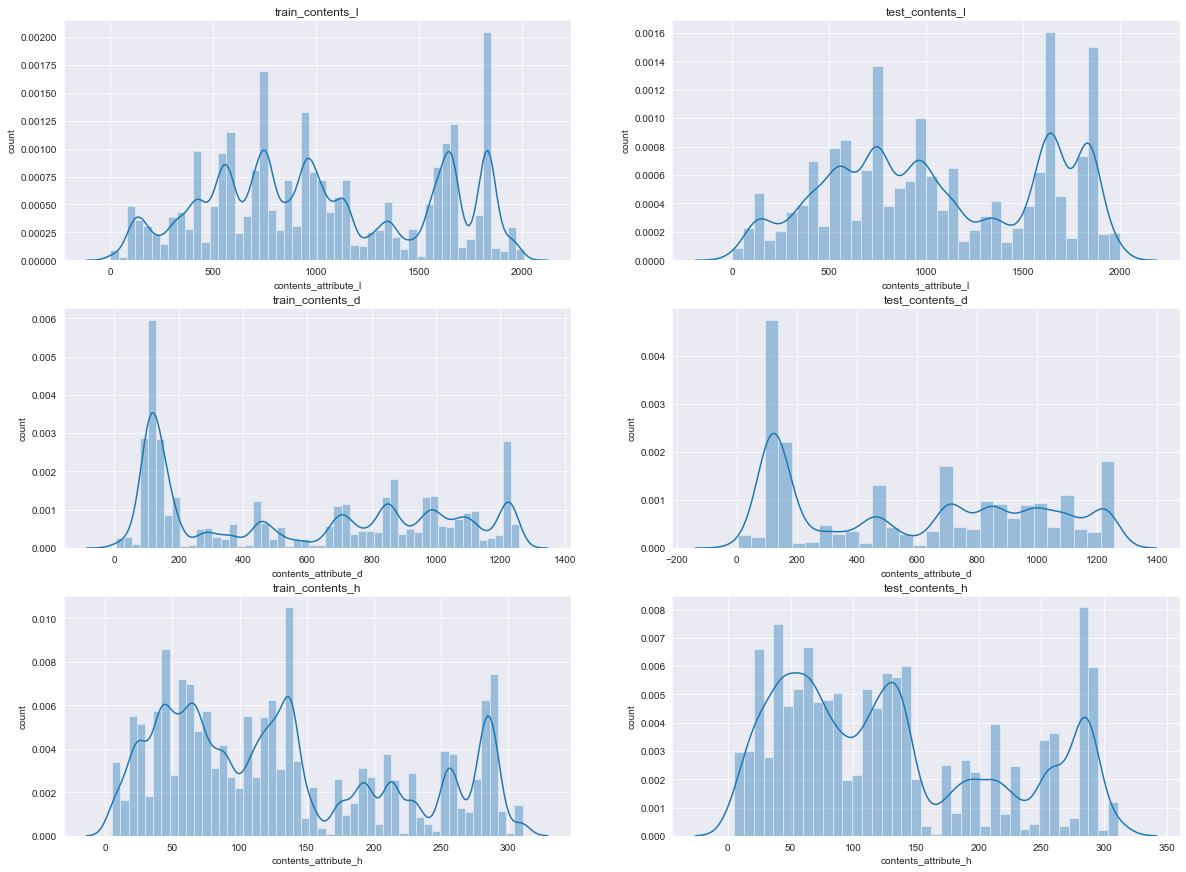

In [118]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) =plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(20,15)

sns.distplot(train["contents_attribute_l"], ax=ax1)
sns.distplot(test["contents_attribute_l"], ax=ax2)
sns.distplot(train["contents_attribute_d"], ax=ax3)
sns.distplot(test["contents_attribute_d"], ax=ax4)
sns.distplot(train["contents_attribute_h"], ax=ax5)
sns.distplot(test["contents_attribute_h"], ax=ax6)

         
ax1.set(ylabel='count', title ="train_contents_l")
ax2.set(ylabel='count', title ="test_contents_l")
ax3.set(ylabel='count', title ="train_contents_d")
ax4.set(ylabel='count', title ="test_contents_d")
ax5.set(ylabel='count', title ="train_contents_h")
ax6.set(ylabel='count', title ="test_contents_h")

In [141]:
count_col(train["contents_attribute_l"], test["contents_attribute_l"])

train
[(759, 15373), (1648, 11984), (1835, 10967)]
train values: 1752
---------------
test
[(759, 1530), (1648, 1465), (1835, 1279)]
test values: 1422


In [142]:
count_col(train["contents_attribute_d"], test["contents_attribute_d"])

train
[(1227, 24668), (114, 23028), (857, 18808)]
train values: 1065
---------------
test
[(1227, 2266), (114, 1882), (102, 1596)]
test values: 919


In [143]:
count_col(train["contents_attribute_h"], test["contents_attribute_h"])

train
[(139, 15030), (288, 13430), (68, 11877)]
train values: 250
---------------
test
[(139, 1244), (288, 1198), (68, 1128)]
test values: 247


D, H, L 데이터와 테스트데이터 비교
--

**D**

In [145]:
test["contents_attribute_d"].describe()

count    46404.000000
mean       591.182958
std        404.253447
min          4.000000
25%        144.000000
50%        665.000000
75%        969.000000
max       1256.000000
Name: contents_attribute_d, dtype: float64

In [146]:
D["속성 D 코드"].describe()

count    1114.000000
mean      627.250449
std       361.091553
min         4.000000
25%       313.250000
50%       628.500000
75%       937.750000
max      1258.000000
Name: 속성 D 코드, dtype: float64

In [148]:
print("contents_attribute_d 원소 개수 :", len(set(test["contents_attribute_d"])))
print("속성 D 코드 원소 개수",len(set(D["속성 D 코드"])))

contents_attribute_d 원소 개수 : 919
속성 D 코드 원소 개수 1114


In [149]:
print("교집합 :", len(set(D["속성 D 코드"])&set(test["contents_attribute_d"])))

교집합 : 919


In [150]:
print("속성 D 코드 원소집합 - contents_attribute_d 원소집합 :", len(set(D["속성 D 코드"])-set(test["contents_attribute_d"])))

속성 D 코드 원소집합 - contents_attribute_d 원소집합 : 195


In [151]:
195+919

1114

In [152]:
print("contents_attribute_d 원소집합-속성 D 코드 원소집합 :", len(set(test["contents_attribute_d"])-set(D["속성 D 코드"])))

contents_attribute_d 원소집합-속성 D 코드 원소집합 : 0


**contents_attribute_d $\subset$ 속성 D 코드**

In [153]:
test["속성 D 코드"]=test["contents_attribute_d"]

In [155]:
test=pd.merge(test, D, how='inner', on='속성 D 코드')

**H**

In [157]:
test["contents_attribute_h"].describe()

count    46404.000000
mean       132.014675
std         87.976082
min          5.000000
25%         57.000000
50%        117.000000
75%        199.000000
max        311.000000
Name: contents_attribute_h, dtype: float64

In [158]:
H["속성 H 코드"].describe()

count    294.000000
mean     158.183673
std       89.885405
min        2.000000
25%       81.250000
50%      158.500000
75%      235.750000
max      314.000000
Name: 속성 H 코드, dtype: float64

In [164]:
print("contents_attribute_h 원소 개수 :", len(set(test["contents_attribute_h"])))
print("속성 H 코드 원소 개수",len(set(H["속성 H 코드"])))

contents_attribute_h 원소 개수 : 247
속성 H 코드 원소 개수 294


In [165]:
print("교집합 :", len(set(H["속성 H 코드"])&set(test["contents_attribute_h"])))

교집합 : 247


In [166]:
print("속성 H 코드 원소집합 - contents_attribute_h 원소집합 :", len(set(H["속성 H 코드"])-set(test["contents_attribute_h"])))

속성 H 코드 원소집합 - contents_attribute_h 원소집합 : 47


In [167]:
print("contents_attribute_h 원소집합-속성 H 코드 원소집합 :", len(set(test["contents_attribute_h"])-set(H["속성 H 코드"])))

contents_attribute_h 원소집합-속성 H 코드 원소집합 : 0


**contents_attribute_h $\subset$ 속성 H 코드**

In [168]:
test["속성 H 코드"]=test["contents_attribute_h"]

In [169]:
test=pd.merge(test, H, how='inner', on='속성 H 코드')

**L**

In [170]:
test["contents_attribute_l"].describe()

count    46404.000000
mean      1073.661775
std        539.545363
min          1.000000
25%        631.000000
50%        987.000000
75%       1645.000000
max       1998.000000
Name: contents_attribute_l, dtype: float64

In [171]:
L["속성 L 코드"].describe()

count    2025.000000
mean     1013.000000
std       584.711467
min         1.000000
25%       507.000000
50%      1013.000000
75%      1519.000000
max      2025.000000
Name: 속성 L 코드, dtype: float64

In [172]:
print("contents_attribute_l 원소 개수 :", len(set(test["contents_attribute_l"])))
print("속성 L 코드 원소 개수",len(set(L["속성 L 코드"])))

contents_attribute_l 원소 개수 : 1422
속성 L 코드 원소 개수 2025


In [173]:
print("교집합 :", len(set(L["속성 L 코드"])&set(test["contents_attribute_l"])))

교집합 : 1422


In [175]:
print("속성 L 코드 원소집합 - contents_attribute_l 원소집합 :", len(set(L["속성 L 코드"])-set(test["contents_attribute_l"])))

속성 L 코드 원소집합 - contents_attribute_l 원소집합 : 603


In [174]:
print("contents_attribute_l 원소집합-속성 L 코드 원소집합 :", len(set(test["contents_attribute_l"])-set(L["속성 L 코드"])))

contents_attribute_l 원소집합-속성 L 코드 원소집합 : 0


**contents_attribute_l $\subset$ 속성 L 코드**

In [176]:
test["속성 L 코드"]=test["contents_attribute_l"]

In [177]:
test=pd.merge(test, L, how='inner', on='속성 L 코드')

In [180]:
#test.to_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/test_1.csv", index=False)

추가적으로 컨텐츠 속성 train과 test 비교해보기
--

In [272]:
train=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/train_3.csv")

**D**

In [197]:
print("train | test 합집합 :", 
len(set(train["contents_attribute_d"])|set(test["contents_attribute_d"])))

train | test 합집합 : 1073


In [198]:
print("train & test 교집합 :",
len(set(train["contents_attribute_d"])&set(test["contents_attribute_d"])))

train & test 교집합 : 911


In [199]:
print("train - test 차집합 :",
len(set(train["contents_attribute_d"])-set(test["contents_attribute_d"])))

train - test 차집합 : 154


In [200]:
print("test - train 차집합 :",
len(set(test["contents_attribute_d"])-set(train["contents_attribute_d"])))

test - train 차집합 : 8


In [201]:
len(set(D["속성 D 코드"]))

1114

In [215]:
print("여집합 :", 
len(set(D["속성 D 코드"]))-len(set(train["contents_attribute_d"])|set(test["contents_attribute_d"])))

여집합 : 41


**H**

In [202]:
print("train | test 합집합 :", 
len(set(train["contents_attribute_h"])|set(test["contents_attribute_h"])))

train | test 합집합 : 250


In [203]:
print("train & test 교집합 :",
len(set(train["contents_attribute_h"])&set(test["contents_attribute_h"])))

train & test 교집합 : 247


In [204]:
print("train - test 차집합 :",
len(set(train["contents_attribute_h"])-set(test["contents_attribute_h"])))

train - test 차집합 : 3


In [205]:
print("test - train 차집합 :",
len(set(test["contents_attribute_h"])-set(train["contents_attribute_h"])))

test - train 차집합 : 0


In [207]:
len(set(H["속성 H 코드"]))

294

In [214]:
print("여집합 :", 
len(set(H["속성 H 코드"]))-len(set(train["contents_attribute_h"])|set(test["contents_attribute_h"])))

여집합 : 44


**L**

In [208]:
print("train | test 합집합 :", 
len(set(train["contents_attribute_l"])|set(test["contents_attribute_l"])))

train | test 합집합 : 1762


In [209]:
print("train & test 교집합 :",
len(set(train["contents_attribute_l"])&set(test["contents_attribute_l"])))

train & test 교집합 : 1412


In [210]:
print("train - test 차집합 :",
len(set(train["contents_attribute_l"])-set(test["contents_attribute_l"])))

train - test 차집합 : 340


In [211]:
print("test - train 차집합 :",
len(set(test["contents_attribute_l"])-set(train["contents_attribute_l"])))

test - train 차집합 : 10


In [212]:
len(set(L["속성 L 코드"]))

2025

In [213]:
print("여집합 :", 
len(set(L["속성 L 코드"]))-len(set(train["contents_attribute_l"])|set(test["contents_attribute_l"])))

여집합 : 263


**train, test**

In [277]:
set(train.columns)-set(test.columns)

{'target'}

Modeling
--

In [280]:
#test.drop(['match_yn', 'match_yn_d', 'match_yn_h'], axis=1, inplace=True)

In [296]:
#test.to_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/test_3.csv", index=False)

In [297]:
len(set(train.columns)|set(test.columns))

52

In [298]:
len(set(train.columns)&set(test.columns))

51

In [299]:
set(train.columns)-set(test.columns)

{'target'}

In [300]:
set(test.columns)-set(train.columns)

set()

In [301]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(random_state=42)

train&test 분리해서 실험 후 실제로 학습시키기

In [303]:
x=train.drop("target", axis=1)
y=train["target"]

In [305]:
from sklearn.model_selection import train_test_split

In [306]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [309]:
from sklearn.metrics import f1_score
cb.fit(x_train, y_train)
y_pred=cb.predict(x_test)
train_score=cb.score(x_train, y_train)
test_score=cb.score(x_test, y_test)
f_1=f1_score(y_test, y_pred)

In [308]:
print(train_score, test_score, f_1)

0.7532373742404622 0.7274257652578419 0.6831770290610165


In [311]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[43524,  6948],
       [20416, 29503]], dtype=int64)

In [313]:
from sklearn.metrics import classification_report
auc_roc=classification_report(y_test, y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.68      0.86      0.76     50472
           1       0.81      0.59      0.68     49919

    accuracy                           0.73    100391
   macro avg       0.75      0.73      0.72    100391
weighted avg       0.74      0.73      0.72    100391



실제로 학습시켜서 제출하기

In [314]:
x_train=train.drop('target', axis=1)
y_train=train["target"]

In [327]:
cb.fit(x_train, y_train)
y_pred=cb.predict(x_train)
train_score=cb.score(x_train, y_train)
f_1=f1_score(y_train, y_pred)

In [316]:
print("train_score", train_score)
print("f1_score", f_1)

train_score 0.7509956151098414
f1_score 0.7131381567471793


In [317]:
confusion_matrix(y_train, y_pred)

array([[221603,  29503],
       [ 95485, 155360]], dtype=int64)

In [318]:
auc_roc=classification_report(y_train, y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.70      0.88      0.78    251106
           1       0.84      0.62      0.71    250845

    accuracy                           0.75    501951
   macro avg       0.77      0.75      0.75    501951
weighted avg       0.77      0.75      0.75    501951



In [319]:
pred=cb.predict(test)

In [320]:
sub=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/sample_submission.csv")

In [321]:
df_pred=pd.DataFrame(pred, columns=['target'])

In [322]:
sub

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
46399,46399,0
46400,46400,0
46401,46401,0
46402,46402,0


In [323]:
sub.drop("target", axis=1, inplace=True)

In [324]:
sub=pd.concat([sub, df_pred], axis=1)

In [325]:
sub

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
46399,46399,0
46400,46400,0
46401,46401,0
46402,46402,0


<AxesSubplot:xlabel='target', ylabel='count'>

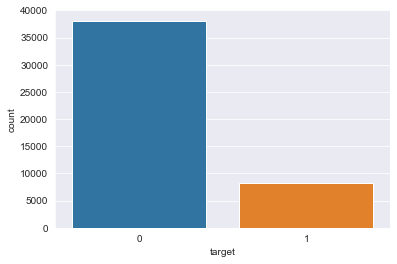

In [326]:
import seaborn

sns.countplot(sub['target'])

In [330]:
#sub.to_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/sub_3.csv", index=False)